In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import dataframe_image as dfi
# !pip install dataframe_image
# from config import Steam_key


In [2]:
from pathlib import Path
game_sales = Path("Video_Games.csv")
game_sales_df = pd.read_csv(game_sales)
game_sales_df.head()
game_sales_df = df_filtered = game_sales_df[game_sales_df['Global_Sales'] >= 1.0]

In [3]:
genre_counts = game_sales_df['Genre'].value_counts()
genre_counts

Action          421
Sports          305
Shooter         256
Role-Playing    203
Platform        194
Racing          182
Misc            169
Fighting        125
Simulation       93
Puzzle           55
Adventure        41
Strategy         31
Name: Genre, dtype: int64

In [4]:
game_sales_df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [5]:
game_sales_df2 = game_sales_df.copy()
game_sales_df2['Other_game_count'] = game_sales_df2['Other_Sales'].apply(lambda n: n>0)
OT_publisher_df = game_sales_df2.groupby('Publisher')[['Other_Sales','Other_game_count']].sum().sort_values(by='Other_Sales',ascending=False)

OT_publisher_df['Other_avg_ppg'] = OT_publisher_df['Other_Sales']/OT_publisher_df['Other_game_count']
OT_publisher_df['Other_avg_ppg'] = round(OT_publisher_df['Other_avg_ppg'], 2)
print('Sales Numbers in $M')

dfi.export(OT_publisher_df.head(10), 'output_data/OTpub.png')
OT_publisher_df.head(10)

Sales Numbers in $M


,Other_Sales,Other_game_count,Other_avg_ppg
Publisher,,,
Electronic Arts,93.48,338,0.28
Nintendo,89.86,328,0.27
Sony Computer Entertainment,56.27,149,0.38
Activision,53.59,158,0.34
Take-Two Interactive,46.50,93,0.50
Ubisoft,29.94,114,0.26
Konami Digital Entertainment,19.90,57,0.35
Microsoft Game Studios,16.30,56,0.29
THQ,15.25,85,0.18


In [6]:
game_sales_df2['JP_game_count'] = game_sales_df2['JP_Sales'].apply(lambda n: n>0)
JP_publisher_df = game_sales_df2.groupby('Publisher')[['JP_Sales','JP_game_count']].sum().sort_values(by='JP_Sales',ascending=False)

JP_publisher_df['JP_avg_ppg'] = JP_publisher_df['JP_Sales']/JP_publisher_df['JP_game_count']
JP_publisher_df['JP_avg_ppg'] = round(JP_publisher_df['JP_avg_ppg'], 2)
print('Sales Numbers in $M')

dfi.export(JP_publisher_df.head(10), 'output_data/JPpub.png')
JP_publisher_df.head(10)

Sales Numbers in $M


,JP_Sales,JP_game_count,JP_avg_ppg
Publisher,,,
Nintendo,399.55,333,1.20
Sony Computer Entertainment,49.77,110,0.45
Capcom,43.31,59,0.73
Konami Digital Entertainment,28.44,46,0.62
SquareSoft,28.30,19,1.49
Namco Bandai Games,27.62,48,0.58
Enix Corporation,26.20,11,2.38
Square Enix,25.99,40,0.65
Sega,11.86,48,0.25


In [7]:
game_sales_df2['EU_game_count'] = game_sales_df2['EU_Sales'].apply(lambda n: n>0)
EU_publisher_df = game_sales_df2.groupby('Publisher')[['EU_Sales','EU_game_count']].sum().sort_values(by='EU_Sales',ascending=False)

EU_publisher_df['EU_avg_ppg'] = EU_publisher_df['EU_Sales']/EU_publisher_df['EU_game_count']
EU_publisher_df['EU_avg_ppg'] = round(EU_publisher_df['EU_avg_ppg'], 2)
print('Sales Numbers in $M')

dfi.export(EU_publisher_df.head(10), 'output_data/EUpub.png')
EU_publisher_df.head(10)

Sales Numbers in $M


,EU_Sales,EU_game_count,EU_avg_ppg
Publisher,,,
Nintendo,398.88,327,1.22
Electronic Arts,267.89,335,0.80
Activision,160.60,162,0.99
Sony Computer Entertainment,137.04,145,0.95
Ubisoft,98.10,114,0.86
Take-Two Interactive,94.67,93,1.02
Microsoft Game Studios,57.23,56,1.02
Sega,49.39,73,0.68
THQ,47.96,82,0.58


In [8]:
game_sales_df2['NA_game_count'] = game_sales_df2['NA_Sales'].apply(lambda n: n>0)
NA_publisher_df = game_sales_df2.groupby('Publisher')[['NA_Sales','NA_game_count']].sum().sort_values(by='NA_Sales',ascending=False)

NA_publisher_df['NA_avg_ppg'] = NA_publisher_df['NA_Sales']/NA_publisher_df['NA_game_count']
NA_publisher_df['NA_avg_ppg'] = round(NA_publisher_df['NA_avg_ppg'], 2)
print('Sales Numbers in $M')

dfi.export(NA_publisher_df.head(10), 'output_data/NApub.png')
NA_publisher_df.head(10)

Sales Numbers in $M


,NA_Sales,NA_game_count,NA_avg_ppg
Publisher,,,
Nintendo,767.59,329,2.33
Electronic Arts,374.10,344,1.09
Activision,273.10,161,1.70
Sony Computer Entertainment,192.45,140,1.37
Take-Two Interactive,163.67,92,1.78
Microsoft Game Studios,134.58,56,2.40
Ubisoft,134.14,113,1.19
THQ,84.69,85,1.00
Sega,65.15,70,0.93


In [9]:
game_sales_df2['Global_game_count'] = game_sales_df2['Global_Sales'].apply(lambda n: n>0)
GB_publisher_df = game_sales_df2.groupby('Publisher')[['Global_Sales','Global_game_count']].sum().sort_values(by='Global_Sales',ascending=False)

GB_publisher_df['Global_avg_ppg'] = GB_publisher_df['Global_Sales']/GB_publisher_df['Global_game_count']
GB_publisher_df['Global_avg_ppg'] = round(GB_publisher_df['Global_avg_ppg'], 2)
print('Sales Numbers in $M')

dfi.export(GB_publisher_df.head(10), 'output_data/GBpub.png')
GB_publisher_df.head(10)

Sales Numbers in $M


,Global_Sales,Global_game_count,Global_avg_ppg
Publisher,,,
Nintendo,1655.89,339,4.88
Electronic Arts,745.46,344,2.17
Activision,493.34,162,3.05
Sony Computer Entertainment,435.47,149,2.92
Take-Two Interactive,310.34,93,3.34
Ubisoft,266.00,114,2.33
Microsoft Game Studios,210.34,56,3.76
THQ,151.37,85,1.78
Sega,139.85,74,1.89


In [10]:
# Group the data by Publisher and calculate the sum of global sales for each publisher
publisher_sales = game_sales_df.groupby('Publisher')['Global_Sales'].sum()
# Sort the data by global sales in descending order
sorted_publishers = publisher_sales.sort_values(ascending=False)
# Get the top 10 publishers by global sales
top_10_publishers = sorted_publishers.head(10)
# Display the top 10 publishers by global sales
print(top_10_publishers)

Publisher
Nintendo                        1655.89
Electronic Arts                  745.46
Activision                       493.34
Sony Computer Entertainment      435.47
Take-Two Interactive             310.34
Ubisoft                          266.00
Microsoft Game Studios           210.34
THQ                              151.37
Sega                             139.85
Konami Digital Entertainment     128.98
Name: Global_Sales, dtype: float64


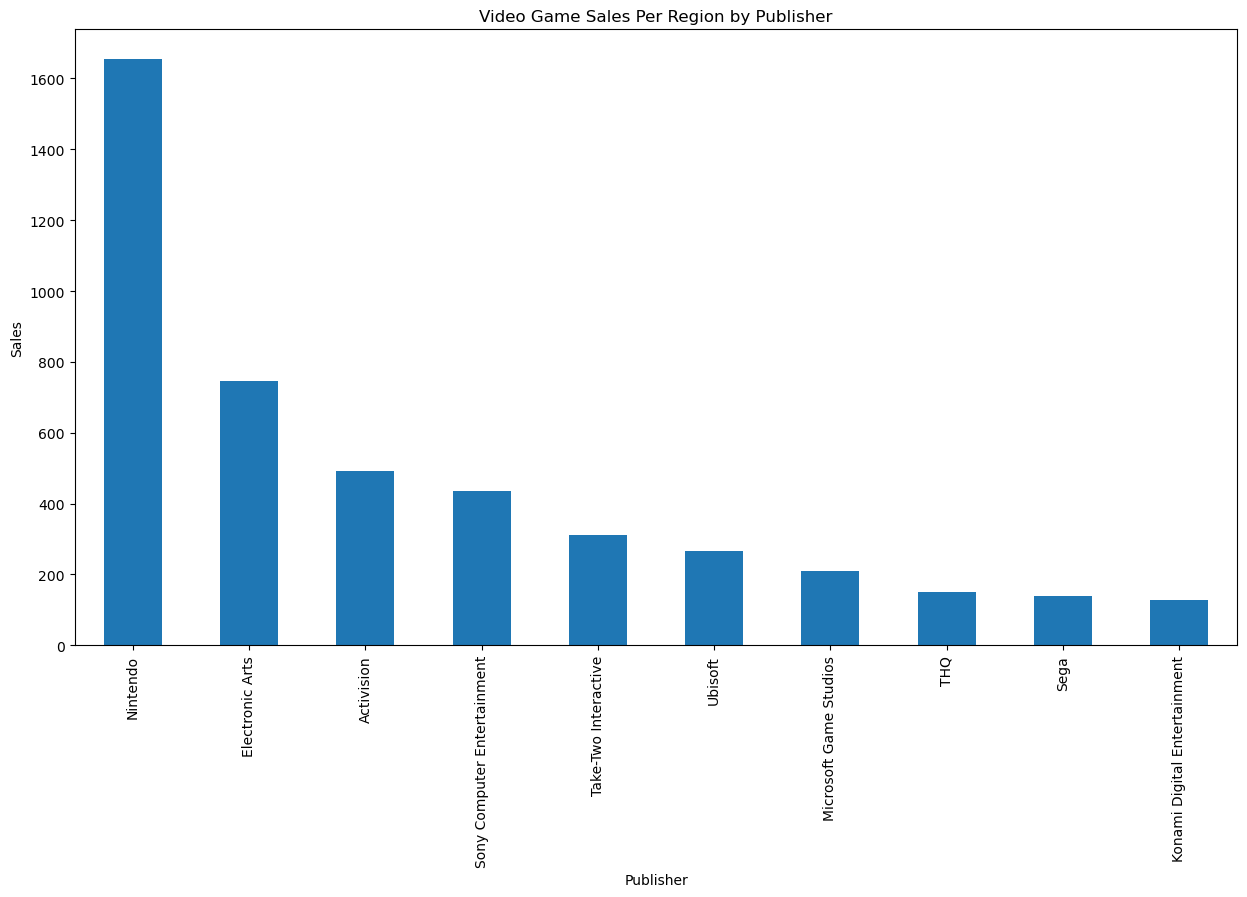

In [11]:
top_10_publishers.plot(kind='bar',figsize=(15,8))
plt.xlabel('Publisher')
plt.ylabel('Sales')
plt.title('Video Game Sales Per Region by Publisher');
# dfi.export(top_10_publishers.head(10), 'GBbarpub.png')
plt.savefig('output_data/GBbarpub')
plt.show()

In [12]:
game_sales_df3 = game_sales_df.copy()
game_sales_df3['OT_game_count'] = game_sales_df2['Other_Sales'].apply(lambda n: n>0)
OT_genre_df = game_sales_df3.groupby('Genre')[['Other_Sales','OT_game_count']].sum().sort_values(by='Other_Sales',ascending=False)

OT_genre_df['OT_avg_ppg'] = OT_genre_df['Other_Sales']/OT_genre_df['OT_game_count']
OT_genre_df['OT_avg_ppg'] = round(OT_genre_df['OT_avg_ppg'], 2)
print('Sales Numbers in $M')

dfi.export(OT_genre_df.head(10), 'output_data/OTgenre.png')
OT_genre_df.head(10)

Sales Numbers in $M


,Other_Sales,OT_game_count,OT_avg_ppg
Genre,,,
Action,122.61,417,0.29
Sports,91.73,297,0.31
Shooter,79.20,252,0.31
Racing,53.86,181,0.30
Misc,45.18,161,0.28
Role-Playing,41.83,181,0.23
Platform,38.24,189,0.20
Fighting,23.74,121,0.20
Simulation,17.68,89,0.20


In [13]:
game_sales_df3['JP_game_count'] = game_sales_df2['JP_Sales'].apply(lambda n: n>0)
JP_genre_df = game_sales_df3.groupby('Genre')[['JP_Sales','JP_game_count']].sum().sort_values(by='JP_Sales',ascending=False)

JP_genre_df['JP_avg_ppg'] = JP_genre_df['JP_Sales']/JP_genre_df['JP_game_count']
JP_genre_df['JP_avg_ppg'] = round(JP_genre_df['JP_avg_ppg'], 2)
print('Sales Numbers in $M')

dfi.export(JP_genre_df.head(10), 'output_data/JPgenre.png')
JP_genre_df.head(10)

Sales Numbers in $M


,JP_Sales,JP_game_count,JP_avg_ppg
Genre,,,
Role-Playing,223.93,172,1.30
Platform,111.81,144,0.78
Action,77.46,271,0.29
Sports,63.87,144,0.44
Misc,54.17,72,0.75
Racing,44.91,105,0.43
Fighting,39.35,83,0.47
Puzzle,37.09,40,0.93
Simulation,34.39,43,0.80


In [14]:
game_sales_df3['EU_game_count'] = game_sales_df2['EU_Sales'].apply(lambda n: n>0)
EU_genre_df = game_sales_df3.groupby('Genre')[['EU_Sales','EU_game_count']].sum().sort_values(by='EU_Sales',ascending=False)

EU_genre_df['EU_avg_ppg'] = EU_genre_df['EU_Sales']/EU_genre_df['EU_game_count']
EU_genre_df['EU_avg_ppg'] = round(EU_genre_df['EU_avg_ppg'], 2)
print('Sales Numbers in $M')

dfi.export(EU_genre_df.head(10), 'output_data/EUgenre.png')
EU_genre_df.head(10)

Sales Numbers in $M


,EU_Sales,EU_game_count,EU_avg_ppg
Genre,,,
Action,340.20,414,0.82
Sports,256.55,291,0.88
Shooter,235.03,252,0.93
Racing,159.95,180,0.89
Platform,157.31,189,0.83
Role-Playing,142.06,170,0.84
Misc,138.91,157,0.88
Simulation,79.74,86,0.93
Fighting,66.69,119,0.56


In [15]:
game_sales_df3['NA_game_count'] = game_sales_df2['NA_Sales'].apply(lambda n: n>0)
NA_genre_df = game_sales_df3.groupby('Genre')[['NA_Sales','NA_game_count']].sum().sort_values(by='NA_Sales',ascending=False)

NA_genre_df['NA_avg_ppg'] = NA_genre_df['NA_Sales']/NA_genre_df['NA_game_count']
NA_genre_df['NA_avg_ppg'] = round(NA_genre_df['NA_avg_ppg'], 2)
print('Sales Numbers in $M')

dfi.export(NA_genre_df.head(10), 'output_data/NAgenre.png')
NA_genre_df.head(10)

Sales Numbers in $M


,NA_Sales,NA_game_count,NA_avg_ppg
Genre,,,
Action,522.14,418,1.25
Shooter,449.19,254,1.77
Sports,383.81,295,1.30
Platform,345.29,189,1.83
Role-Playing,234.44,177,1.32
Misc,234.33,155,1.51
Racing,226.41,179,1.26
Fighting,143.98,122,1.18
Simulation,94.79,87,1.09


In [16]:
game_sales_df3['GB_game_count'] = game_sales_df2['Global_Sales'].apply(lambda n: n>0)
GB_genre_df = game_sales_df3.groupby('Genre')[['Global_Sales','GB_game_count']].sum().sort_values(by='Global_Sales',ascending=False)

GB_genre_df['GB_avg_ppg'] = GB_genre_df['Global_Sales']/GB_genre_df['GB_game_count']
GB_genre_df['GB_avg_ppg'] = round(GB_genre_df['GB_avg_ppg'], 2)
print('Sales Numbers in $M')

dfi.export(GB_genre_df.head(10), 'output_data/GBgenre.png')
GB_genre_df.head(10)

Sales Numbers in $M


,Global_Sales,GB_game_count,GB_avg_ppg
Genre,,,
Action,1062.36,421,2.52
Sports,795.92,305,2.61
Shooter,785.68,256,3.07
Platform,652.60,194,3.36
Role-Playing,642.14,203,3.16
Racing,485.13,182,2.67
Misc,472.56,169,2.80
Fighting,273.75,125,2.19
Simulation,226.68,93,2.44


In [17]:
x = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
genre_df=game_sales_df3.groupby('Genre')[x].sum()
genre_df

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,522.14,340.20,77.46,122.61
Adventure,44.83,30.12,9.54,6.92
Fighting,143.98,66.69,39.35,23.74
Misc,234.33,138.91,54.17,45.18
Platform,345.29,157.31,111.81,38.24
Puzzle,79.24,32.68,37.09,7.44
Racing,226.41,159.95,44.91,53.86
Role-Playing,234.44,142.06,223.93,41.83
Shooter,449.19,235.03,22.31,79.20


<function matplotlib.pyplot.show(close=None, block=None)>

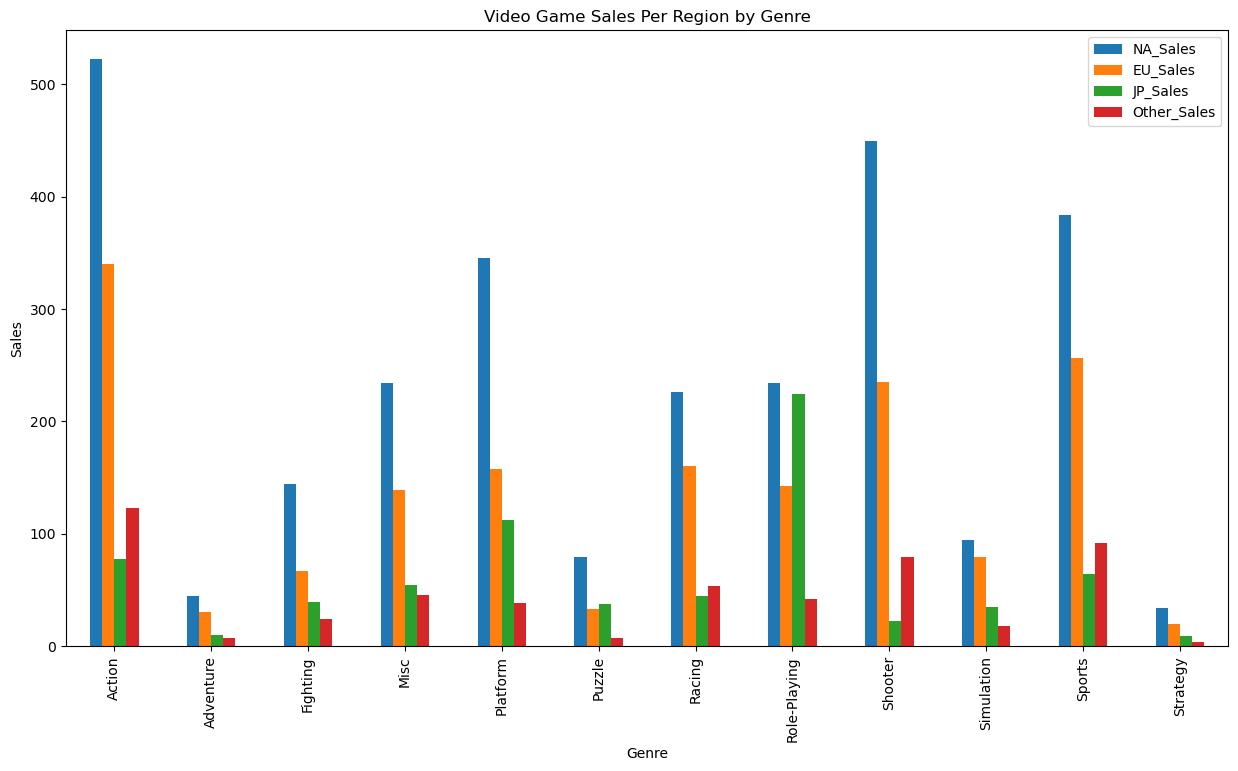

In [18]:
genre_df.plot(kind='bar',figsize=(15,8))
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.title('Video Game Sales Per Region by Genre')
plt.savefig('output_data/Bargenre.png')
plt.show